# Pet project
**Разработка нейросетевой модели для решения задачи детекции изображений**


# 1) Выбор фреймворка/библиотеки для использования детектора

Мой выбор пал на  **torchvision.models.detection**

In [ ]:
import torch

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# 2) Запуск детектора на случайных изображениях

In [ ]:
pip install numpy scipy scikit-image matplotlib

In [ ]:
precision = "fp32"
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:18: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
torch.hub.list('NVIDIA/DeepLearningExamples:torchhub')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


['nvidia_convnets_processing_utils',
 'nvidia_efficientnet',
 'nvidia_efficientnet_b0',
 'nvidia_efficientnet_b4',
 'nvidia_efficientnet_widese_b0',
 'nvidia_efficientnet_widese_b4',
 'nvidia_resneXt',
 'nvidia_resnet50',
 'nvidia_resnext101_32x4d',
 'nvidia_se_resnext101_32x4d',
 'nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_tts_utils',
 'nvidia_waveglow']

In [ ]:
!cat /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/hubconf.py

import os
import sys

from PyTorch.Detection.SSD.ssd import nvidia_ssd, nvidia_ssd_processing_utils
sys.path.append(os.path.join(sys.path[0], 'PyTorch/Detection/SSD'))

from PyTorch.Classification.ConvNets.image_classification.models import resnet50 as nvidia_resnet50
from PyTorch.Classification.ConvNets.image_classification.models import resnext101_32x4d as nvidia_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import se_resnext101_32x4d as nvidia_se_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b0 as nvidia_efficientnet_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b4 as nvidia_efficientnet_b4
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b0 as nvidia_efficientnet_widese_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b4 as nvidia_efficientnet_widese_b4
from PyTo

In [ ]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [ ]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg',
    'https://c3.staticflickr.com/6/5141/5619547317_cf8a8060db_o.jpg'
]

In [ ]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [ ]:
with torch.no_grad():
  detections_batch = ssd_model(tensor)

In [ ]:
print(len(detections_batch))
print(len(detections_batch[0]), detections_batch[0].shape)
print(len(detections_batch[1]), detections_batch[1].shape)

2
4 torch.Size([4, 4, 8732])
4 torch.Size([4, 81, 8732])


In [ ]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.3) for results in results_per_input]

In [ ]:
classes_to_labels = utils.get_coco_object_dictionary()

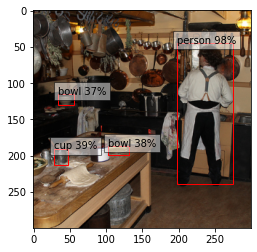

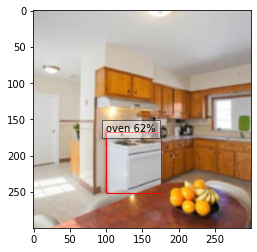

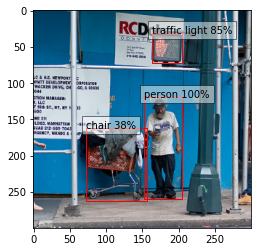

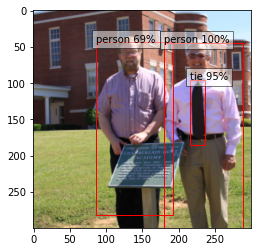

In [ ]:
for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [ ]:
"""
import time
import numpy as np

import torch.backends.cudnn as cudnn
cudnn.benchmark = True

# Helper function to benchmark the model
def benchmark(model, input_shape=(1024, 1, 32, 32), dtype='fp32', nwarmup=50, nruns=1000):
    input_data = torch.randn(input_shape)
    input_data = input_data.to("cuda")
    if dtype=='fp16':
        input_data = input_data.half()

    print("Warm up ...")
    with torch.no_grad():
        for _ in range(nwarmup):
            features = model(input_data)
    torch.cuda.synchronize()
    print("Start timing ...")
    timings = []
    with torch.no_grad():
        for i in range(1, nruns+1):
            start_time = time.time()
            pred_loc, pred_label  = model(input_data)
            torch.cuda.synchronize()
            end_time = time.time()
            timings.append(end_time - start_time)
            if i%100==0:
                print('Iteration %d/%d, avg batch time %.2f ms'%(i, nruns, np.mean(timings)*1000))

    print("Input shape:", input_data.size())
    print("Output location prediction size:", pred_loc.size())
    print("Output label prediction size:", pred_label.size())
    print('Average batch time: %.2f ms'%(np.mean(timings)*1000))
"""

'\nimport time\nimport numpy as np\n\nimport torch.backends.cudnn as cudnn\ncudnn.benchmark = True\n\n# Helper function to benchmark the model\ndef benchmark(model, input_shape=(1024, 1, 32, 32), dtype=\'fp32\', nwarmup=50, nruns=1000):\n    input_data = torch.randn(input_shape)\n    input_data = input_data.to("cuda")\n    if dtype==\'fp16\':\n        input_data = input_data.half()\n\n    print("Warm up ...")\n    with torch.no_grad():\n        for _ in range(nwarmup):\n            features = model(input_data)\n    torch.cuda.synchronize()\n    print("Start timing ...")\n    timings = []\n    with torch.no_grad():\n        for i in range(1, nruns+1):\n            start_time = time.time()\n            pred_loc, pred_label  = model(input_data)\n            torch.cuda.synchronize()\n            end_time = time.time()\n            timings.append(end_time - start_time)\n            if i%100==0:\n                print(\'Iteration %d/%d, avg batch time %.2f ms\'%(i, nruns, np.mean(timings)*10

In [ ]:
"""
# Model benchmark without TRTorch/TensorRT
model = ssd_model.eval().to("cuda")
benchmark(model, input_shape=(128, 3, 300, 300), nruns=1000)
"""

'\n# Model benchmark without TRTorch/TensorRT\nmodel = ssd_model.eval().to("cuda")\nbenchmark(model, input_shape=(128, 3, 300, 300), nruns=1000)\n'

# 3) Выбор датасета

Здесь я выбрал датасет **Wider Face** для детекции лиц

In [ ]:
import numpy as np
import pandas as pd
import pickle
from skimage import io, transform

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
import random

In [ ]:
import os

In [ ]:
import albumentations as alb

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip -q /content/gdrive/My\ Drive/WIDER_train.zip
!unzip -q /content/gdrive/My\ Drive/wider_face_split.zip

# 4) Предобработка данных

In [ ]:
!nvidia-smi
torch.cuda.is_available()

Fri Feb  4 07:34:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   1702MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
#Новый размер изображения
new_size = 300
#Место где будет храниться объект
DEVICE = torch.device('cuda')

In [ ]:
#Сначала считаем всю информацию об изображениях
f = open('/content/wider_face_split/wider_face_train_bbx_gt.txt', 'r')
img_names = []
Boxes = []

while len(img_names) < 12880:
  img_names.append(f.readline().split('\n')[0])
  k = int(f.readline())
  Boxes.append([])
  if k == 0:
    k += 1
    
  for j in range(k):
    str = f.readline().split()
    xmin = int(str[0]) - int(str[2]) / 2
    ymin = int(str[1]) - int(str[3]) / 2
    xmax = int(str[0]) + int(str[2]) / 2
    ymax = int(str[1]) + int(str[3]) / 2
    Boxes[len(img_names)-1].append([xmin, ymin, xmax, ymax])

In [ ]:
f.seek(0)

0

In [ ]:
class WiderFaceDataset(Dataset):
  def __init__(self, trsfm=None, train=True):
    self.train = train
    self.trfsm = trsfm

    self.imgs = img_names
    self.clas = 1

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    img_path = os.path.join('/content/WIDER_train/images', self.imgs[idx])
    img = Image.open(img_path).convert('RGB')
    img.load()

    #img = io.imread(img_path)
    #img = torch.as_tensor(img, dtype=torch.float32)
    #img = img / 255.0
    
    boxes = Boxes[idx]
    boxes = np.array(boxes)
    w, h = img.size
    
    #boxes = torch.as_tensor(boxes, dtype=torch.float32)
    """if self.trsfm:
      img, boxes = self.trsfm([img,boxes])"""

    if self.train:
      tr_img = transforms.Compose([transforms.ColorJitter(brightness=0.5, hue=0.3),
                                   transforms.ToTensor(),
                                   transforms.Resize(size=(new_size, new_size)),
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                   ])
      tr = transforms.Compose([transforms.ToTensor()])

      img = tr_img(img)
      #img = img / 255      
      
      for i in range(len(boxes)):
        boxes[i] = boxes[i] * np.array([new_size/w, new_size/h, new_size/w, new_size/h])
      
      boxes = tr(boxes)


    return img, boxes, torch.tensor(self.clas)


In [ ]:
a = np.array([[1,2,3], [4,5,6]])
a[0] = a[0]*[5,5,5]
a

array([[ 5, 10, 15],
       [ 4,  5,  6]])

In [ ]:
dataset = WiderFaceDataset()
dataloader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=0)

In [ ]:
dataset[0]

(tensor([[[-1.3593, -1.3593, -1.3593,  ..., -1.2297, -1.2035,  0.6516],
          [-1.1906, -1.1906, -1.1906,  ..., -1.1126, -0.9782,  0.6874],
          [-1.2602, -1.2602, -1.2602,  ..., -1.1759, -1.1024,  0.6498],
          ...,
          [-1.7437, -1.8148, -1.8056,  ..., -1.8593, -1.8864,  0.5450],
          [-1.6572, -1.6399, -1.7235,  ..., -1.8459, -1.7783,  0.5871],
          [-1.6480, -1.7400, -1.7981,  ..., -1.6082, -1.6001,  0.5934]],
 
         [[-1.5477, -1.5477, -1.5477,  ..., -1.2985, -1.3017,  0.7912],
          [-1.6230, -1.6230, -1.6230,  ..., -1.3153, -1.2229,  0.7698],
          [-1.6148, -1.6148, -1.6148,  ..., -1.3004, -1.2304,  0.7862],
          ...,
          [-1.3205, -1.3932, -1.3824,  ..., -1.4388, -1.5739,  0.7500],
          [-1.1271, -1.1094, -1.1949,  ..., -1.4250, -1.4991,  0.7696],
          [-1.1688, -1.2642, -1.2963,  ..., -1.2094, -1.3041,  0.7820]],
 
         [[-0.6730, -0.6730, -0.6730,  ..., -0.6707, -0.7268,  1.0208],
          [-0.3203, -0.3203,

In [ ]:
def img_show(sample):
  img = sample[0]
  img = img.numpy().transpose((1,2,0))
  #img = np.clip(img,0,1)
  
  boxes = sample[1][0]

  fig, ax = plt.subplots(1)
  ax.imshow(img)
  for j in range(len(boxes)):
    h = boxes[j][3] - boxes[j][1]
    w = boxes[j][2] - boxes[j][0]
    x = boxes[j][0] + w/2
    y = boxes[j][1] + h/2
    rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none') 
    ax.add_patch(rect)
  plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


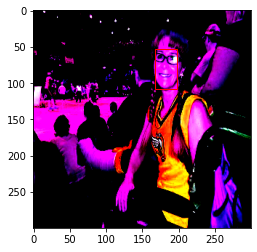

In [ ]:
img_show(dataset[985])

In [ ]:

"""
    sample = {}
    sample['image'] = img
    sample['boxes'] = boxes

    if self.transform:
      sample = self.transform(sample)

    return sample
"""

     """transf = alb.Compose([alb.Resize(new_size, new_size)
                            #alb.pytorch.transforms.ToTensor(),
                            #alb.augmentations.transforms.ColorJitter(brightness=0.5, hue=0.3)
                            ],  bbox_params=alb.BboxParams(format='pascal_voc'))
      transfed = transf(image=img, bboxes=boxes)
      transfed_img = transfed['image']
      transfed_bboxes = transfed['bboxes'] """

In [ ]:
class Rescale(object):
  def __init__(self, out_size):
    assert isinstance(out_size, (int, tuple))
    self.out_size = out_size

  def __call__(self, sample):
    image = sample[0]
    boxes = sample[1]

    h_img, w_img = image.shape[:2]
    
    if isinstance(self.out_size, int):
      if h_img > w_img:
        new_h = self.out_size * h_img / w_img 
        new_w = self.out_size
      else:  
        new_w = self.out_size * w_img / h_img 
        new_h = self.out_size
    else:
      new_h, new_w = self.out_size

    new_h, new_w = int(new_h), int(new_w)

    img = transform.resize(image, (new_h, new_w))

    boxes = boxes * [new_w / w_img, new_h / h_img]

    return img, boxes
    

In [ ]:
class ToTensor(object):
  def __call__(self, sample):
    image, boxes = sample[0], sample[1]
    image = image.transpose((2,0,1))

    return torch.from_numpy(image), torch.from_numpy(boxes)


In [ ]:
transformed_dataset = WiderFaceDataset(trsfm=transforms.Compose([
                                                                     Rescale(300),
                                                                     ToTensor() 
                                                                     ]))
#dataloader = DataLoader(transformed_dataset, batch_size=15, shuffle=True, num_workers=0)

In [ ]:
def get_transforms(train=True):
  trf = []
  trf.append(transforms.ToTensor())
  trf.append(transforms.Resize(size=(new_size, new_size)))
  
  if train:
    trf.append(transforms.ColorJitter(brightness=0.5, hue=0.3))

  return transforms.Compose(trf)

# 5) Обучение модели-детектора

In [ ]:
import torchvision

In [ ]:
sample = dataset[0]
sample

(tensor([[[-1.1224, -1.1224, -1.1224,  ..., -0.6382, -0.6301,  2.1701],
          [-1.2664, -1.2664, -1.2664,  ..., -0.6405, -0.4600,  2.1570],
          [-1.2602, -1.2602, -1.2602,  ..., -0.6281, -0.4911,  2.1678],
          ...,
          [-0.6639, -0.8037, -0.7720,  ..., -0.8987, -1.1736,  2.0933],
          [-0.2661, -0.2327, -0.4045,  ..., -0.8721, -1.0221,  2.1099],
          [-0.3514, -0.5486, -0.6163,  ..., -0.4226, -0.6320,  2.1321]],
 
         [[ 0.3248,  0.3248,  0.3248,  ...,  0.3159,  0.2060,  2.3829],
          [ 1.0582,  1.0582,  1.0582,  ...,  0.6763,  0.7238,  2.4224],
          [ 0.8354,  0.8354,  0.8354,  ...,  0.4857,  0.4210,  2.3784],
          ...,
          [-1.3829, -1.5675, -1.5871,  ..., -1.6646, -1.6390,  2.2080],
          [-1.1728, -1.1488, -1.3244,  ..., -1.5850, -1.4320,  2.2337],
          [-1.1781, -1.3768, -1.4633,  ..., -1.1255, -1.0261,  2.2585]],
 
         [[-0.2884, -0.2884, -0.2884,  ..., -0.0245,  0.0682,  2.5808],
          [ 0.0034,  0.0034,

In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True, num_classes=2, pretrained_backbone=True)
model.eval()
pred = model()

In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()
x = [torch.rand(3, 300, 300)]
print(x)
y = [sample[1]]
print(y)
predictions = model(y)

[tensor([[[0.2848, 0.2281, 0.2342,  ..., 0.0411, 0.9674, 0.8774],
         [0.9123, 0.6970, 0.7573,  ..., 0.5206, 0.8281, 0.1875],
         [0.9559, 0.1571, 0.8182,  ..., 0.6891, 0.0124, 0.1844],
         ...,
         [0.0962, 0.7218, 0.6488,  ..., 0.1758, 0.7018, 0.8576],
         [0.9133, 0.6929, 0.8277,  ..., 0.1490, 0.5605, 0.2873],
         [0.7102, 0.3715, 0.1894,  ..., 0.2151, 0.4213, 0.0819]],

        [[0.8830, 0.6837, 0.6177,  ..., 0.7487, 0.4013, 0.7648],
         [0.7658, 0.4210, 0.2657,  ..., 0.8117, 0.6970, 0.1828],
         [0.4179, 0.9104, 0.9072,  ..., 0.5922, 0.8666, 0.9488],
         ...,
         [0.1410, 0.7318, 0.4935,  ..., 0.4631, 0.9938, 0.5545],
         [0.4628, 0.7514, 0.0619,  ..., 0.8899, 0.5070, 0.2639],
         [0.6691, 0.6164, 0.0224,  ..., 0.7620, 0.4071, 0.4290]],

        [[0.5081, 0.5831, 0.8789,  ..., 0.4823, 0.0036, 0.4111],
         [0.1465, 0.7441, 0.1675,  ..., 0.6601, 0.8481, 0.3531],
         [0.9583, 0.6136, 0.8295,  ..., 0.0328, 0.3663, 0

RuntimeError: ignored

TypeError: ignored

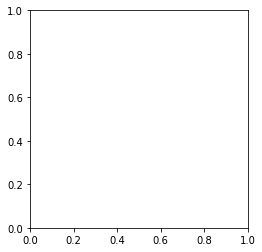

In [ ]:
img = sample[1]
img = img.numpy().transpose((1,2,0))
boxes = predictions[0]['boxes']
_, ax = plt.subplots(1)
ax.imshow(img)
for j in range(len(boxes)):
    h = boxes[j][3] - boxes[j][1]
    w = boxes[j][2] - boxes[j][0]
    x = boxes[j][0] + w/2
    y = boxes[j][1] + h/2
    rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none') 
    ax.add_patch(rect)
plt.show()